In [62]:
%load_ext watermark
%watermark -p tensorflow,numpy -v -m

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 2.7.6
IPython 5.2.2

tensorflow 1.0.0
numpy 1.12.0

compiler   : GCC 4.8.4
system     : Linux
release    : 4.4.43-boot2docker
machine    : x86_64
processor  : x86_64
CPU cores  : 1
interpreter: 64bit


In [63]:
%matplotlib inline

In [64]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [65]:
# 这里是 Tensorflow 用文件队列的形式进行文件读取的代码
# 文件队列的好处是可以异步读取数据，这样可以『多线程』进行工作
filenames = ['lena512.png']
filename_queue = tf.train.string_input_producer(filenames)

reader = tf.WholeFileReader()
key, value = reader.read(filename_queue)

images = tf.image.decode_png(value, channels=1)


In [66]:
with tf.Session() as sess:    
    # 文件队列异步读取进队列的一些操作，开始读取
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    
    before_image = sess.run(images)
    #before_image = tf.to_float32(before_image)
    # 这里得到的其实是一个 512 x 512 x 1 的 numpy 数组
    print(before_image.shape)
    
    # 因为 conv2d 要求的是一个 4维的输入，这里用 expand_dim 扩展一维 (batch)
    input_ = tf.expand_dims(before_image, 0)
    ## 请在这里完成卷积操作，对图像进行平滑，并保存平滑后的图像。在最后进行展示
    input_ = tf.to_float(input_)
    
    print(input_.shape)
    # filter 也可以使用二维矩阵指定之后，用 expand_dims 进行扩展
    
    patch_size = 3
    filter1 = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, 1, 1], stddev=0.5))

    print(filter1)
    
    tf.global_variables_initializer().run()
    
    filter_run = sess.run(filter1)
    print(filter_run.reshape(patch_size, patch_size))
    
    conv = tf.nn.conv2d(input_, filter1, strides=[1, 2, 2, 1],
                    padding="SAME",)
    after_image = sess.run(conv)
    print(after_image.shape)
    
    # 停止读取
    coord.request_stop()
    coord.join(threads)

(512, 512, 1)
(1, 512, 512, 1)
Tensor("Variable_17/read:0", shape=(3, 3, 1, 1), dtype=float32)
[[-0.55222344 -0.65361905  0.24830611]
 [ 0.39751798 -0.73553318  0.43003777]
 [-0.07218993  0.30650061  0.65672857]]
(1, 256, 256, 1)


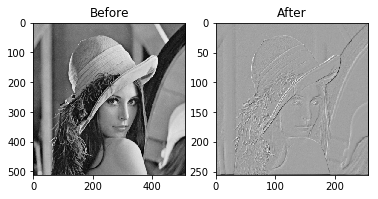

In [67]:
f, axarr = plt.subplots(1, 2)
axarr[0].imshow(before_image[:, :, 0], cmap='gray')
axarr[0].set_title('Before') 

axarr[1].imshow(after_image[0, :, :, 0], cmap='gray')
axarr[1].set_title('After') 